# Relative Momentum

Description

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import STAR_DATE, END_DATE

### Importando os dados

In [2]:
IBOV = yf.Ticker('^BVSP')

ibov_prices = IBOV.history(start=STAR_DATE, end=END_DATE)['Close']
ibov_prices.index = pd.to_datetime(ibov_prices.index).date

In [3]:
SP500 = yf.Ticker('^GSPC')

sp500_prices = SP500.history(start=STAR_DATE, end=END_DATE)['Close']
sp500_prices.index = pd.to_datetime(sp500_prices.index).date

In [4]:
USD = yf.Ticker('BRL=X')

usd_prices = USD.history(period='max')['Close']
usd_prices.index = pd.to_datetime(usd_prices.index).date

In [13]:
usd_prices

2003-12-01    2.9230
2003-12-02    2.9310
2003-12-03    2.9310
2003-12-04    2.9430
2003-12-05    2.9340
               ...  
2024-09-03    5.6151
2024-09-04    5.6475
2024-09-05    5.6420
2024-09-06    5.5675
2024-09-08    5.5897
Name: Close, Length: 4974, dtype: float64

In [5]:
brl_usd = pd.concat([sp500_prices, usd_prices], keys=['SP500', 'BRL/USD'], join='inner', axis=1)
brl_usd['SP500 BRL'] = brl_usd['SP500'] * brl_usd['BRL/USD']

In [6]:
relative_prices = pd.concat([ibov_prices, brl_usd['SP500 BRL']], keys=['IBOV', 'SP500 BRL'], join='inner', axis=1)
relative_prices = (relative_prices / relative_prices.iloc[0])

relative_prices

,IBOV,SP500 BRL
2004-01-02,1.000000,1.000000
2004-01-05,1.048429,1.004299
2004-01-06,1.050390,1.010179
2004-01-07,1.038984,1.009744
2004-01-08,1.056672,1.013335
...,...,...
2024-08-30,6.059434,9.971021
2024-09-03,5.985877,9.738271
2024-09-04,6.064201,9.778767
2024-09-05,6.081622,9.739760


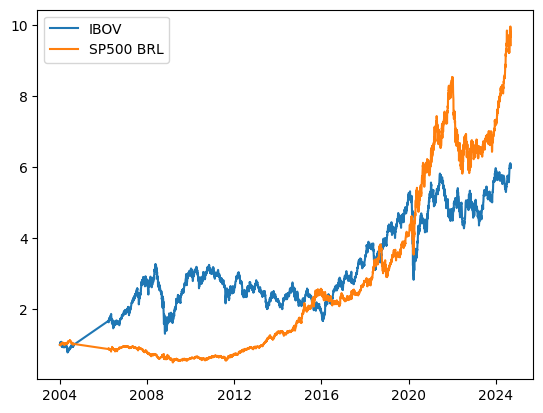

In [7]:

plt.plot(relative_prices)
plt.legend(relative_prices.columns)
plt.show()